In [2]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import pickle

In [3]:
# Set working directory
os.chdir(os.path.dirname(os.getcwd()))
os.getcwd()

'/home/ubuntu/diabetes_detection'

In [4]:
# Import local libraries
from src.logger import set_logger as sl

In [5]:
# Load table for all patients + Polygenic risk scores (PRS)
id_prs = pd.read_table("data/T2D_PMID_30297969.all_score", sep="\s+", dtype={"FID":str,"IID":str})
id_prs.rename(columns={"IID":"ID","Pt_1":"PRS"})
print(f"Patients all: {len(id_prs)}")

# Load table for t2d patients
id_t2d = pd.read_table("data/E11-id.txt", names=["ID"], dtype={"ID":str})
print(f"Patients w/T2D: {len(id_t2d)}")

# Load table for all patients with fundus images
id_fun = pd.DataFrame(set([f.split("_")[0] for f in  os.listdir("/mnt/ukbb/raw/")]), columns=["ID"])
print(f"Patients w/Fun: {len(id_fun)}")

Patients all: 487409
Patients w/T2D: 24143
Patients w/Fun: 85623


In [6]:
# Summary of the PRS for all UKBB
id_prs.describe().Pt_1

count    487409.000000
mean          0.031752
std           0.001003
min           0.026910
25%           0.031076
50%           0.031745
75%           0.032417
max           0.039177
Name: Pt_1, dtype: float64

In [7]:
# Create a flag on id_prs for patients with T2D
t2d = set(id_t2d.ID)
id_prs["t2d"] = id_prs.IID.apply(lambda x: 1 if x in t2d else 0)

In [14]:
# Split the data in deciles
id_prs["decile_rank"] = pd.qcut(x=id_prs["Pt_1"], q=10, labels=False)

# Using the deciles sepparate the data in low, moderte an high risk
# 0 = low
# 1-8 = Moderate
# 9 = High
bounds = {0:"low",1:"low", 8:"high", 9:"high"}
id_prs["risk_rank"] = id_prs["decile_rank"].apply(lambda x: bounds.get(x, "moderate"))
id_prs.risk_rank.value_counts()

moderate    292445
low          97482
high         97482
Name: risk_rank, dtype: int64

In [17]:
# For all T2D Patients get rank information
t2din_low = id_prs[id_prs.risk_rank == "low"].t2d.value_counts()
t2din_moderate = id_prs[id_prs.risk_rank == "moderate"].t2d.value_counts()
t2din_high = id_prs[id_prs.risk_rank == "high"].t2d.value_counts()
t2d_all = t2din_low[1] + t2din_moderate[1] + t2din_high[1]

print(f"Patients with T2D and PRS: {t2d_all}")
print(f"Ratio of patients with t2d on risk low:  {t2din_low[1]}  {100*t2din_low[1]/t2d_all:.4f} %")
print(f"Ratio of patients with t2d on risk mod: {t2din_moderate[1]} {100*t2din_moderate[1]/t2d_all:.4f} %")
print(f"Ratio of patients with t2d on risk high: {t2din_high[1]} {100*t2din_high[1]/t2d_all:.4f} %")

Patients with T2D and PRS: 23182
Ratio of patients with t2d on risk low:  1945  8.3901 %
Ratio of patients with t2d on risk mod: 12892 55.6121 %
Ratio of patients with t2d on risk high: 8345 35.9978 %


In [9]:
# Sort values
id_prs = id_prs.sort_values(by=["Pt_1"])

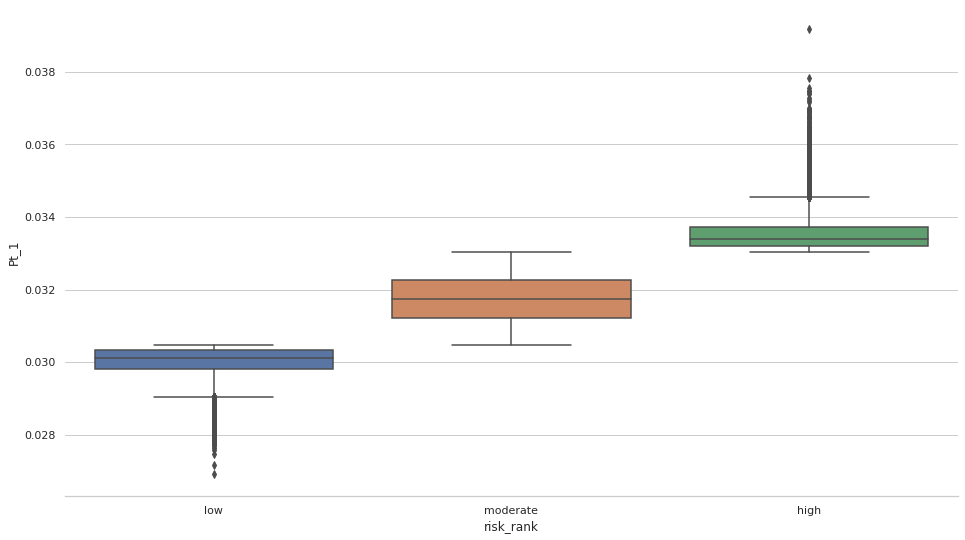

In [30]:
# Boxplot of PRS values by risk
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(16,9))
sns.boxplot(ax=ax, y=id_prs["Pt_1"], x=id_prs["risk_rank"])
sns.despine(left=True)

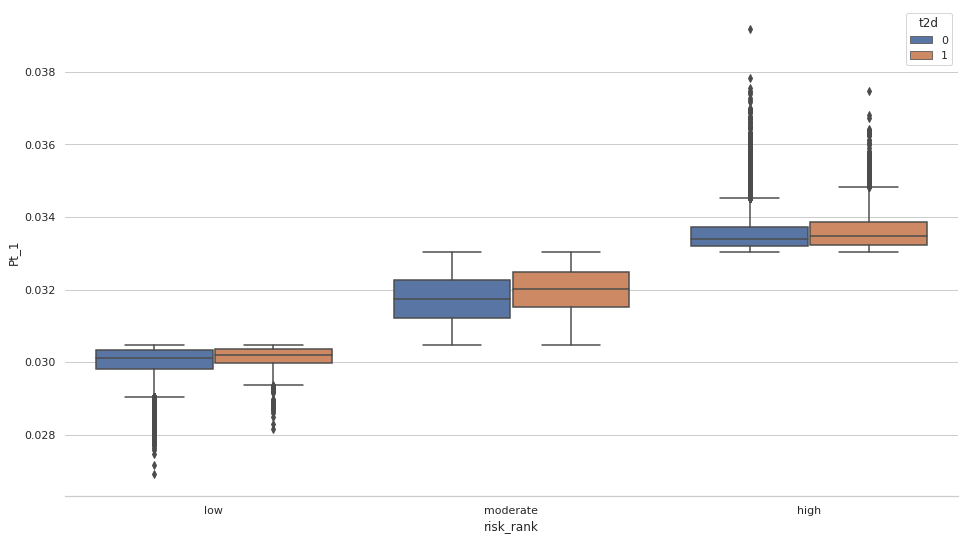

In [31]:
# Boxplot of PRS values by risk
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(16,9))
sns.boxplot(ax=ax, y=id_prs["Pt_1"], x=id_prs["risk_rank"], hue=id_prs["t2d"])
sns.despine(left=True)